In [43]:
from pathlib import Path
import pandas as pd
import numpy as np

In [44]:
processed = Path('../../data/processed')
selection_data = pd.read_pickle(Path(processed) / 'selection_data.pkl')

In [45]:
selection_data.ChooseTeam.value_counts()

AttributeError: 'DataFrame' object has no attribute 'ChooseTeam'

In [46]:
selection_data = selection_data[selection_data.year >= 2000]
# selection_data = selection_data[(selection_data.year < 2000) & (selection_data.year >= 1960)]

In [47]:
selection_data.b_PA_in_G.value_counts().sort_index()

1      14
2      50
3     164
4    2936
5    3616
6     499
7      50
8       7
9       2
Name: b_PA_in_G, dtype: Int64

In [48]:
selection_data[['spot', 'home']].value_counts()

spot  home
1.0   0.0     2018
      1.0     1693
2.0   0.0      914
3.0   0.0      904
      1.0      745
2.0   1.0      650
4.0   0.0      197
      1.0      149
5.0   0.0       37
      1.0       22
6.0   0.0        8
7.0   0.0        1
dtype: int64

In [49]:
def adjust_plot(plt):
    plt.xaxis.grid(False)
    plt.yaxis.grid(True, linestyle='dashed', color='lightgrey')
    plt.set_axisbelow(True)
    plt.xaxis.set_ticks_position('none') 
    plt.yaxis.set_ticks_position('none') 

    plt.spines['right'].set_visible(False)
    plt.spines['top'].set_visible(False)

In [50]:
Wins = selection_data.loc[selection_data['Win'] == True, 'Win'].count()
Loses = selection_data.loc[selection_data['Win'] == False, 'Win'].count()
WinRate = round( (Wins / (Wins + Loses)) *100, 1)
print('Win pick rate: ' + str(WinRate) + '%')

Win pick rate: 77.5%


In [51]:
day_wins = selection_data.groupby('Date')['Win'].prod()
print('Win both picks rate: ' + str(round(day_wins.mean()*100, 1)) + '%')

Win both picks rate: 60.1%


In [19]:
def streak_counter(df):
    df['L_Win'] = df['Win'].shift(1)
    df['L_year'] = df['year'].shift(1)
    df['start_of_streak'] = (df['Win'] != df['L_Win']) | (df['year'] != df['L_year'])
    df['streak_id'] = df['start_of_streak'].cumsum()
    df['streak_counter'] = df.groupby('streak_id').cumcount() + 1
    df.loc[df.Win == 0, 'streak_counter'] = 0
    
    return df

In [20]:
selection_data = selection_data.astype({'Win':'int8'})
selection_data = streak_counter(selection_data)
streaks = selection_data.groupby('streak_id').agg({'streak_counter':'max'})
streaks['streak_counter'].max()

38

In [21]:
year_results = selection_data.groupby('year').agg({'Win':'mean', 'streak_counter':'max', 'EstProb': 'mean'})
year_results

,Win,streak_counter,EstProb
year,,,
2000.0,0.793296,17,0.806646
2001.0,0.788889,15,0.802446
2002.0,0.822222,23,0.808865
2003.0,0.761111,20,0.798883
2004.0,0.766667,24,0.804159
2005.0,0.802778,21,0.802090
2006.0,0.758333,22,0.802868
2007.0,0.790055,22,0.811216
2008.0,0.809392,38,0.807959


In [22]:
selection_data['EstProb'].describe()

count    7338.000000
mean        0.790285
std         0.033735
min         0.692362
25%         0.771762
50%         0.785067
75%         0.801271
max         1.000000
Name: EstProb, dtype: float64

<AxesSubplot:xlabel='EstProb', ylabel='Win'>

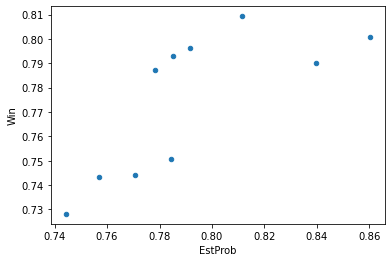

In [23]:
selection_data['bin'] = pd.qcut(selection_data['EstProb'], 10, duplicates='drop')

dots = selection_data.groupby(['bin'])[['EstProb', 'Win']].agg('mean')
dots = dots.reset_index()
dots.plot.scatter('EstProb','Win')

In [24]:
selection_data[['EstProb', 'Win']].mean()

EstProb    0.790285
Win        0.774734
dtype: float64

In [25]:
# Start including data from current season

# Relief pitchers data

# Set up S3 if necessary for size, or for GPUs

# Check # training observations for each model fit 
# and make sure we aren't losing any

# Ensemble methods for NN and logistic

# Rest days

# Adjust Pitcher and Batter stats for park record ( merge it in and divide) - compare adjusted at home and away stats

# New pitcher flag?

# Find out where they are in the rotation

# Fix training so that it doesn't need to specify number of variables

# Split up grid search vs. non-grid search training

# Why is Win missing? Check merge loss

# Time-series CV

# Come up with potential guesses remaining counter (get schedule from retrosheet)

# Predict closer from roster and then use their rgs to construct estimated closing rgs (or just rgs for closing team)

# predicting game length

# Calculate streaks by aggregating predictions by day and not counting if any pick loses.

# add league dummy to model

# Average multiple prediction methods

# Come up with pitcher vs. Batter metrics

# check out distribution of PAs for selections. See if we can find a way to cut off the left tail.

# Park Factors by handedness

# Park Factors by hitter distribution (L vs. R, 1 v 2 v 3 v HR)

# Come up with Batter vs. Pitcher Stats and graph distribution to see tails.

# Add temperature and force of win from or to

# Pitcher cold streaks to identify pre-injury or slumps that batters can exploit

# Generate games left vs. current streak metric and come up with simple rules

# Come up with Marcel coefficients by ignoring PAs and doing regression with people with certain number of appearances
# OR just do MLE/GMM to come up with correct numbers. I think MLE should work.

# Check New variables for any scaling issues and winsorize where necessary.

# Estimate value function prob distribution using schedule, projected lineups, and player projections

In [26]:
restricted = selection_data.loc[
    (selection_data['EstProb'] >= .75) &
#     (selection_data['park_h_factor'] >= 1) &
    (selection_data['spot'] <= 4),
    ['Win', 'year']
]

In [27]:
restricted= restricted.astype({'Win':'int8'})
restricted = streak_counter(restricted)
streaks = restricted.groupby('streak_id').agg({'streak_counter':'max'})
streaks['streak_counter'].max()

35

In [28]:
Wins = restricted.loc[
    (restricted['Win'] == True),
    'Win'].count()
Loses = restricted.loc[
    (restricted['Win'] == False),
    'Win'].count()
WinRate = round( (Wins / (Wins + Loses)) *100, 1)
print(str(WinRate) + '%')

78.2%


In [29]:
year_results = restricted.groupby('year').agg({'Win':'mean', 'streak_counter':'max'})
year_results

,Win,streak_counter
year,,
2000.0,0.789174,17
2001.0,0.796296,15
2002.0,0.835260,23
2003.0,0.769912,20
2004.0,0.774481,24
2005.0,0.801170,21
2006.0,0.758621,20
2007.0,0.792614,22
2008.0,0.809117,35


In [30]:
year_results['streak_counter'].sum()

404

In [31]:
selection_data = selection_data.sort_values(['year', 'Date'])

In [32]:
selection_data['pick_day'] = selection_data.groupby(['year']).cumcount() + 1
selection_data['pick_day'] = np.ceil(selection_data['pick_day'] / 2)

In [33]:
year_results.sort_values(['Win'], ascending=[False])

,Win,streak_counter
year,,
2002.0,0.835260,23
2008.0,0.809117,35
2005.0,0.801170,21
2019.0,0.798283,20
2001.0,0.796296,15
2018.0,0.795987,18
2007.0,0.792614,22
2013.0,0.791045,16
2015.0,0.789655,17
